# Traffic Crashes Analysis

## Importing Libraries

In [101]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras import models

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten,Input,Dropout, Flatten 
from tensorflow.keras import layers



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pickle import dump

## Data Staging

In [102]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [103]:
df = pd.read_csv('Traffic_Crashes_Chicago.csv')
df.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",09/05/2023 07:05:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,5500,S,WENTWORTH AVE,225.0,NaN,NaN,NaN,NaN,NaN,NaN,2,INCAPACITATING INJURY,3.0,0.0,1.0,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/22/2023 06:50:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,7900,S,CHICAGO SKYWAY OB,411.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/09/2023 11:40:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,10020,W,BALMORAL AVE,1650.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


## Data Understanding

In [104]:
df.shape

(794956, 48)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                794956 non-null  object 
 1   CRASH_DATE_EST_I               59606 non-null   object 
 2   CRASH_DATE                     794956 non-null  object 
 3   POSTED_SPEED_LIMIT             794956 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         794956 non-null  object 
 5   DEVICE_CONDITION               794956 non-null  object 
 6   WEATHER_CONDITION              794956 non-null  object 
 7   LIGHTING_CONDITION             794956 non-null  object 
 8   FIRST_CRASH_TYPE               794956 non-null  object 
 9   TRAFFICWAY_TYPE                794956 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      794956 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [106]:
# Data Cleaning

In [107]:
df.duplicated().sum()

0

In [108]:
df.isnull().sum().sum()

8031966

In [109]:
df.isnull().mean()*100

CRASH_RECORD_ID                   0.000000
CRASH_DATE_EST_I                 92.501975
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         74.966413
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       2.925697
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           77.078606
NOT_RIGHT_OF_WAY_I               95.379996
HIT_AND_RUN_I                    68.724558
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO  

In [110]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 



```
# This is formatted as code
```

### Dropping columns with high Missing Values

In [111]:
columns_to_drop = ['CRASH_DATE_EST_I','LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
                   'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I',
                   'WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']

In [112]:
df = df.drop(columns=columns_to_drop)

In [113]:
df.shape

(794956, 37)

In [114]:
df.isnull().sum().sum()

53374

In [115]:
df.isnull().mean()*100

CRASH_RECORD_ID                  0.000000
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      2.925697
CRASH_TYPE                       0.000000
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0.000503
STREET_NAME                      0.000126
BEAT_OF_OCCURRENCE               0.000629
NUM_UNITS                        0.000000
MOST_SEVERE_INJURY               0

### Drop rows with missing values

In [116]:
df.dropna(inplace = True)

In [124]:
df.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [118]:
df.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NO

### Droping Columns not needed

In [119]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
18,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,07/29/2023 02:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",08/03/2023 01:55:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,1320,E,47TH ST,222.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,14,7,7,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
27,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,08/13/2023 10:10:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",08/13/2023 10:29:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3210,W,FOSTER AVE,1712.0,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,0.0,10,1,8,41.975853,-87.709134,POINT (-87.709134319958 41.975852858025)
28,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,08/09/2023 07:55:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",08/09/2023 08:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,7458,S,LAFAYETTE AVE,731.0,2,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,0.0,19,4,8,41.758246,-87.626522,POINT (-87.626521907009 41.758245504966)
36,64063a32537af636c3a234b85f6a67ecb159a34af31da5...,08/19/2023 04:50:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,UNKNOWN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",08/19/2023 05:30:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,1100,W,DIVISION ST,1822.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,7,8,41.903640,-87.655547,POINT (-87.655546970003 41.903639930952)


In [120]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [121]:
columns_dropping = ['CRASH_RECORD_ID','STREET_NO','BEAT_OF_OCCURRENCE','LOCATION','INJURIES_INCAPACITATING',
                    'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                    'INJURIES_UNKNOWN', ]

In [122]:
df = df.drop(columns = columns_dropping)

In [123]:
df['PRIM_CONTRIBUTORY_CAUSE'].unique()

array(['FAILING TO REDUCE SPEED TO AVOID CRASH', 'UNABLE TO DETERMINE',
       'IMPROPER BACKING', 'IMPROPER LANE USAGE',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'IMPROPER OVERTAKING/PASSING',
       'DISREGARDING TRAFFIC SIGNALS', 'WEATHER',
       'IMPROPER TURNING/NO SIGNAL', 'DRIVING ON WRONG SIDE/WRONG WAY',
       'NOT APPLICABLE', 'FOLLOWING TOO CLOSELY',
       'DISTRACTION - FROM INSIDE VEHICLE', 'ANIMAL',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'TEXTING',
       'EQUIPMENT - VEHICLE CONDITION',
       'DISREGARDING OTHER TRAFFIC SIGNS', 'DISREGARDING STOP SIGN',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'ROAD CONSTRUCTION/MAINTENANCE',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'PHYSICAL CONDITION OF DRIVER', 'DISREGARDING YIELD SIGN',
       'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 'TURNING RIGH

## Explanatory Data Analysis (EDA)

In [25]:
df.head(5)

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
2,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",S,ASHLAND AVE,4,NO INDICATION OF INJURY,0.0,0.0,14,7,7,41.854120,-87.665902
18,07/29/2023 02:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",08/03/2023 01:55:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,E,47TH ST,2,NO INDICATION OF INJURY,0.0,0.0,14,7,7,41.809781,-87.594213
27,08/13/2023 10:10:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",08/13/2023 10:29:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,W,FOSTER AVE,3,NO INDICATION OF INJURY,0.0,0.0,10,1,8,41.975853,-87.709134
28,08/09/2023 07:55:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",08/09/2023 08:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,S,LAFAYETTE AVE,2,NONINCAPACITATING INJURY,5.0,0.0,19,4,8,41.758246,-87.626522
36,08/19/2023 04:50:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,UNKNOWN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",08/19/2023 05:30:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,W,DIVISION ST,2,NO INDICATION OF INJURY,0.0,0.0,16,7,8,41.903640,-87.655547


In [26]:
df.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

# Exploratory Data Analysis

### In this section, we will be exploring our data in relation to our objectives earlier highlighted

 Heatmap Showing the Correlation Matrix of the Dataset

In [27]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

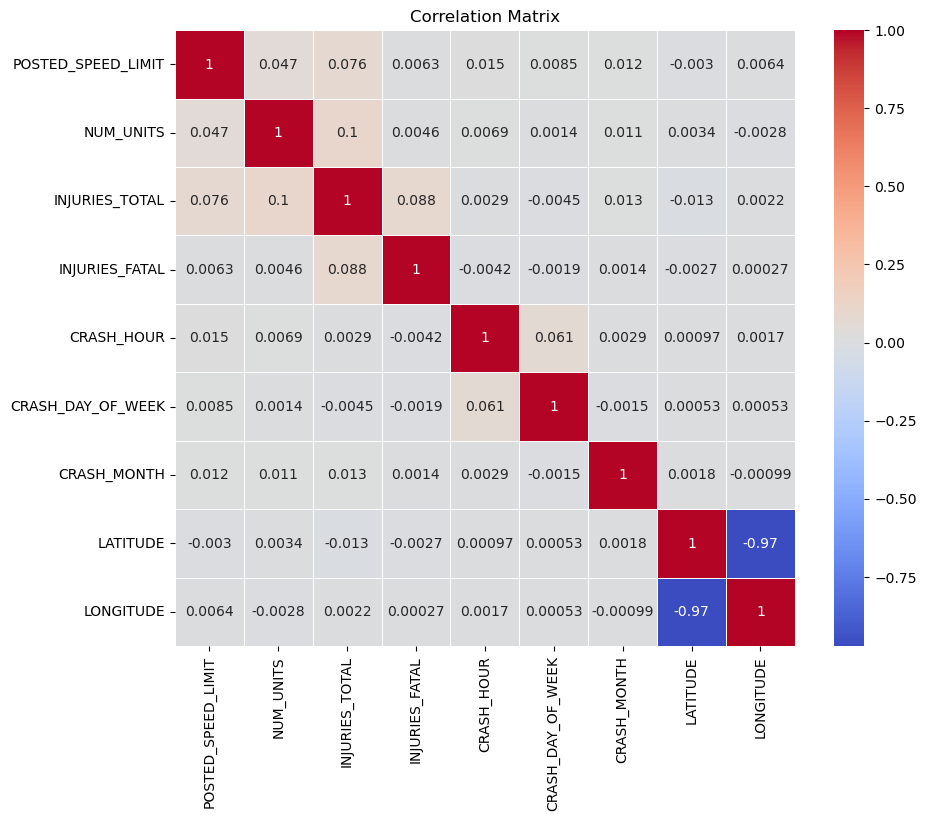

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In this visualization, you are creating a heatmap to display the correlation matrix of the dataset. The heatmap uses color intensity to represent the strength of correlations between different numerical variables, with a color scale ranging from cool (indicating negative correlation) to warm (indicating positive correlation). The annot=True option adds the correlation coefficient values directly on the heatmap cells, making it easy to interpret. The title "Correlation Matrix" gives context to the chart. This visualization helps in identifying relationships between various features in the dataset—such as which variables are positively or negatively correlated—providing valuable insights for feature selection, model building, or further analysis.

## Visualizing Impact of crashes on economy and health

###Plotting a Pie Chart

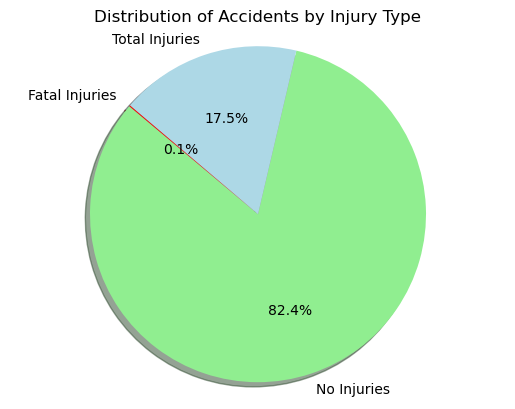

In [29]:
# visualizing the distribution of accidents by injury type using pie chart

accidents_no_injuries = (df['INJURIES_TOTAL'] == 0).sum()  # Accidents with no injuries
total_injuries = df['INJURIES_TOTAL'].sum()  # Sum of all injuries
fatal_injuries = df['INJURIES_FATAL'].sum()  # Sum of fatal injuries

# Data for the pie chart
labels = ['No Injuries', 'Total Injuries', 'Fatal Injuries']
sizes = [accidents_no_injuries, total_injuries, fatal_injuries]
colors = ['lightgreen', 'lightblue', 'red']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Show the plot
plt.title('Distribution of Accidents by Injury Type')
plt.show()

The pie chart titled 'Distribution of Accidents by Injury Type' illustrates the proportion of accidents categorized into three groups: 'No Injuries', 'Total Injuries', and 'Fatal Injuries'. The No Injuries segment (light green) represents accidents where no injuries occurred, the Total Injuries segment (light blue) includes all reported injuries, and the Fatal Injuries segment (red) highlights accidents that resulted in fatalities. Each segment is labeled with its percentage, providing a clear view of the distribution. This visualization helps identify the relative frequency of safe incidents compared to accidents with injuries or fatalities, offering valuable insights for improving road safety and reducing accident severity.

##Visualizing economic impact of accidents

###Plotting a Pie Chart

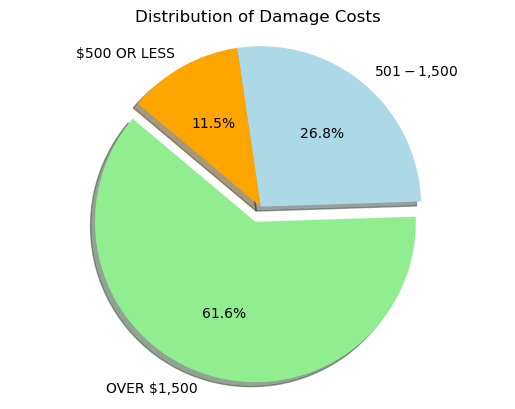

In [30]:
# Visualizing distribution of damage cost using pie chart
damage_counts = df['DAMAGE'].value_counts()


labels = damage_counts.index
sizes = damage_counts.values
colors = ['lightgreen', 'lightblue', 'orange']
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Damage Costs')
plt.show()

The pie chart "Distribution of Damage Costs" shows the proportion of accidents categorized by different levels of damage costs from the dataset. Each segment represents a category of damage, with its size corresponding to the number of accidents in that category. The chart uses diffrent colors for each category (light green, light blue, and orange), and the first segment is slightly separated to highlight it. Percentages are displayed on each segment, making it easy to interpret the distribution. This visualization provides a clear overview of how accidents are distributed based on damage costs, offering insights into the frequency of each category.

#Visualizing Primary Contributory Causes of Car Accidents

##Bar Plot

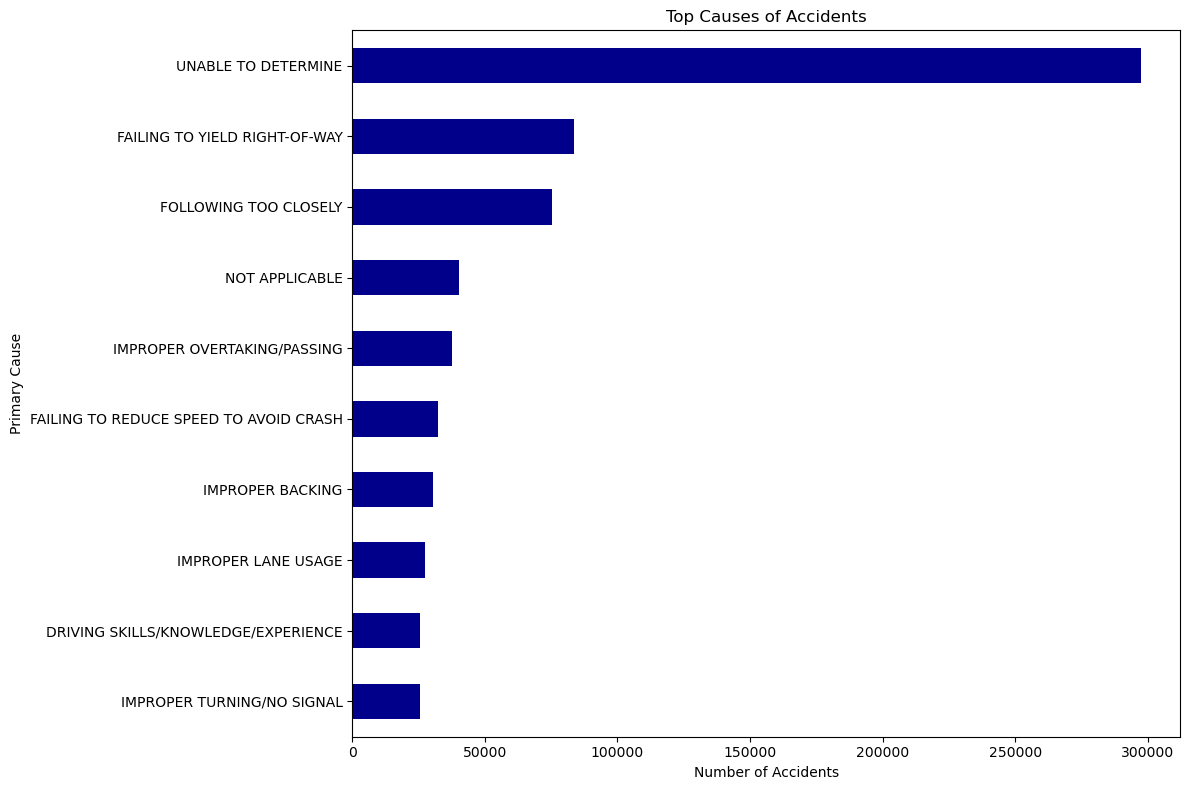

In [31]:
# Visualize the top 10 primary causes of accidents


primary_causes = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
top_10 = primary_causes[:10]


plt.figure(figsize=(12, 8))
top_10.plot(kind='barh', color='darkblue')
plt.title('Top Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Primary Cause')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The bar chart "Top Causes of Accidents" visualizes the top 10 primary causes of accidents based on the dataset. The x-axis represents the number of accidents, while the y-axis lists the primary causes of those accidents. The chart uses a horizontal bar layout, with bars colored in dark blue to emphasize the severity and frequency of each cause. The bars are arranged in descending order, with the most frequent causes at the top. This visualization helps to identify the leading factors contributing to accidents, offering valuable insights for targeted safety interventions and preventive measures.

#Visualizing High-Risk Locations for Traffic Accidents

##Bar Plot

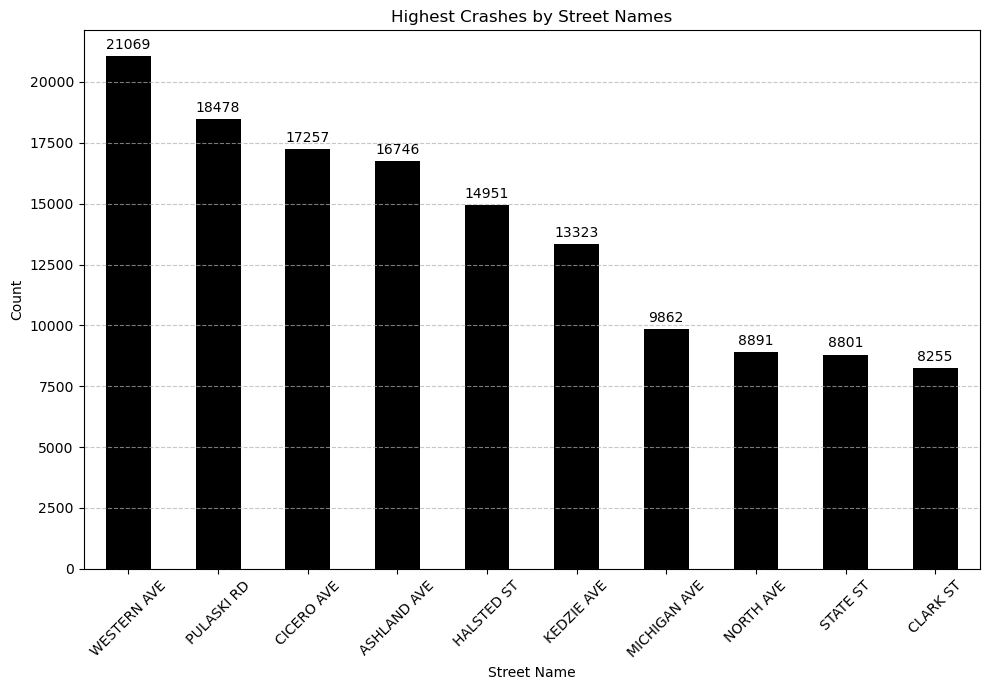

In [32]:
# Calculate value counts for the filtered DataFrame
filtered_counts = df['STREET_NAME'].value_counts()

# Select top 5 weather conditions
top_15_counts = filtered_counts.head(10)

plt.figure(figsize=(10, 7))
ax = top_15_counts.plot(kind='bar', color='black')
plt.title('Highest Crashes by Street Names')
plt.xlabel('Street Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

plt.show()

The bar chart "Highest Crashes by Street Names" shows the top 10 streets with the highest number of crashes. The x-axis lists the street names, while the y-axis shows the crash count for each street. Each bar is labeled with the exact count of crashes, and the chart includes horizontal gridlines for easy comparison. This visualization helps to identify high-risk streets, providing insights that can assist in planning safety measures and reducing crashes in those areas.

#Visualizing Impact of Traffic Control Devices on Accidents

##Bar plot

C:\Users\perpe\AppData\Local\Temp\ipykernel_13732\4260738003.py:28: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  barplot = sns.barplot(x='STREET_NAME', y='CRASH_COUNT', hue='TRAFFIC_CONTROL_DEVICE', data=top_df, palette=colors)


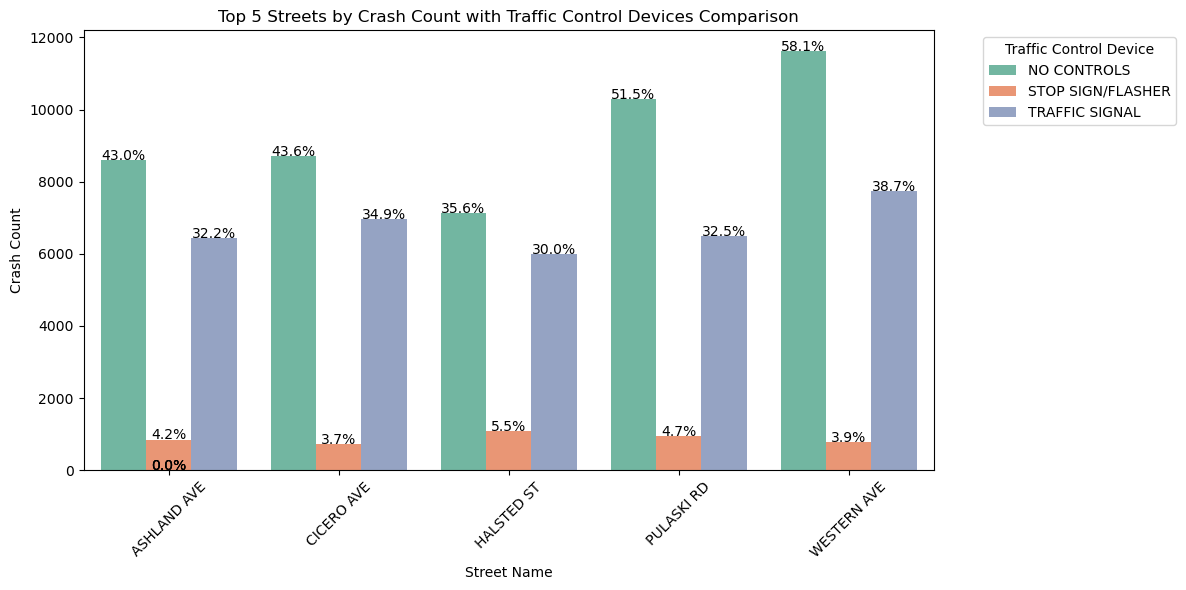

In [33]:
# Group by street name and traffic control device, and count the number of crashes
grouped = df.groupby(['STREET_NAME', 'TRAFFIC_CONTROL_DEVICE']).size().reset_index(name='CRASH_COUNT')

# Get top 5 streets by crash count
top_streets = grouped.groupby('STREET_NAME')['CRASH_COUNT'].sum().nlargest(5).index

# Filter the DataFrame for the top 5 streets
top_df = grouped[grouped['STREET_NAME'].isin(top_streets)]

# Get top 3 traffic control devices by crash count
top_devices = top_df.groupby('TRAFFIC_CONTROL_DEVICE')['CRASH_COUNT'].sum().nlargest(5).index

# Filter the DataFrame for the top 3 traffic control devices
top_df = top_df[top_df['TRAFFIC_CONTROL_DEVICE'].isin(top_devices)]

# Filter out 'UNKNOWN' and 'OTHERS' traffic control devices
top_df = top_df[~top_df['TRAFFIC_CONTROL_DEVICE'].isin(['UNKNOWN', 'OTHER'])]

# Calculate percentages
total_crashes = top_df.groupby('STREET_NAME')['CRASH_COUNT'].transform('sum')
top_df['PERCENTAGE'] = (top_df['CRASH_COUNT'] / total_crashes) * 100

# Create a custom color palette
colors = sns.color_palette('Set2', n_colors=len(top_devices))

# Create a bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='STREET_NAME', y='CRASH_COUNT', hue='TRAFFIC_CONTROL_DEVICE', data=top_df, palette=colors)

# Add labels and title
plt.xlabel('Street Name')
plt.ylabel('Crash Count')
plt.title('Top 5 Streets by Crash Count with Traffic Control Devices Comparison')
plt.xticks(rotation=45)
plt.legend(title='Traffic Control Device', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2, height + 1, f'{height/200:.1f}%', ha='center')

plt.tight_layout()
plt.show()

The bar char "Top 5 Streets by Crash Count with Traffic Control Devices Comparison" shows the five streets with the highest number of crashes and the types of traffic control devices used on those streets. The x-axis represents the street names, while the y-axis shows the crash count for each street, broken down by the traffic control device in place. Different colors are used to represent the various traffic control devices, and the chart includes percentage labels to indicate the proportion of crashes attributed to each device on each street. This visualization helps to compare the effectiveness of different traffic control devices on high-risk streets, offering valuable insights for improving safety measures.

#Visualizing the Impact of Speed on Traffic Accidents

##Histogram

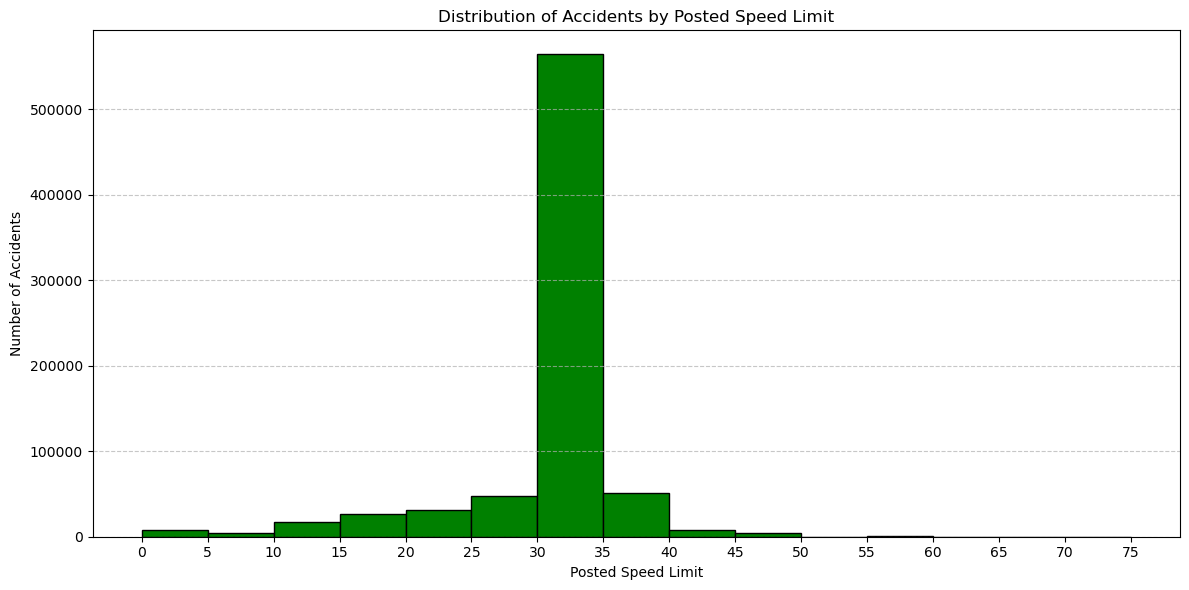

In [34]:
# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(df['POSTED_SPEED_LIMIT'], bins=range(0, 80, 5),color='green', edgecolor='black')

# Add labels and title
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Posted Speed Limit')
plt.xticks(range(0, 80, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The histogram "Distribution of Accidents by Posted Speed Limit" displays the distribution of accidents based on the posted speed limits on the roads. The x-axis represents the posted speed limits, grouped into bins of 5 mph intervals, while the y-axis shows the number of accidents occurring within each speed limit range. The histogram bars are colored in green with black edges for clear visibility, and gridlines are included along the y-axis for easier comparison. This visualization helps to identify patterns and trends related to accidents at different speed limits, offering insights into whether higher or lower speed limits are associated with more frequent accidents.

#Visualizing the Impact of Timing on Crashes

##Pie Chart

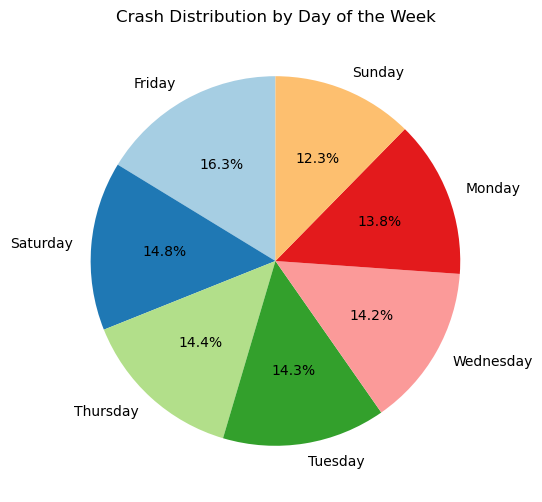

In [35]:
# Map numbers to days of the week

day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

df['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK'].map(day_mapping)

# Pie chart visualizations for accident occurrence on different days of the week

day_counts = df['CRASH_DAY_OF_WEEK'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Crash Distribution by Day of the Week')
plt.show()

The pie chart pie chart to display the distribution of accidents by day of the week. The data is first mapped to days of the week using a dictionary, where each number (1 to 7) is assigned to a corresponding day (Sunday to Saturday). The x-axis represents the days of the week, and the pie chart segments show the proportion of accidents that occurred on each day. The chart is colored using a distinct palette, and the percentage of accidents for each day is displayed within each segment. This visualization helps to identify which days are more prone to accidents, offering valuable insights for focusing safety measures or interventions on specific days.

#Visualizing Crash occurrence based on time of day

##Bar Chart

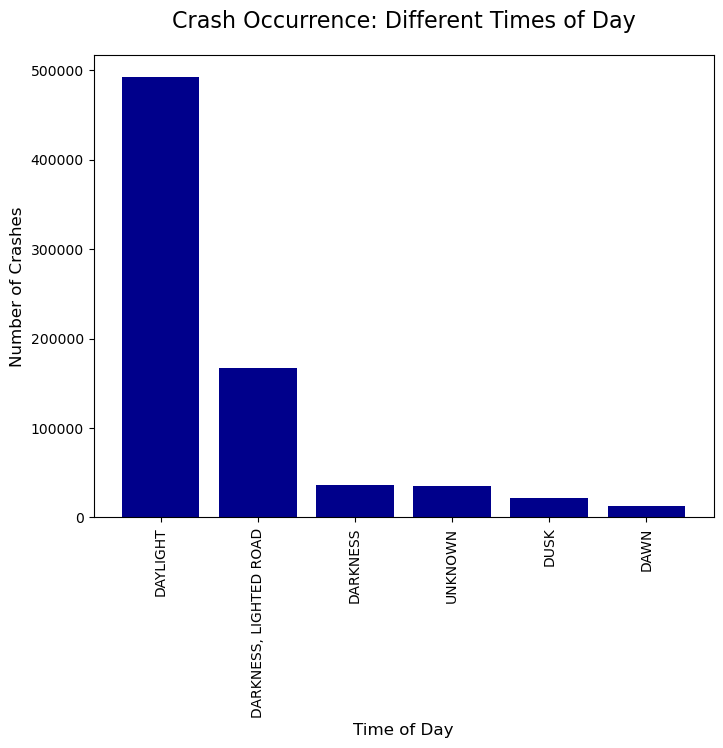

In [36]:
# Bar chart to visualize crash occurrence based on time of day

# Count occurrences of Daytime and Nighttime crashes
time_counts = df['LIGHTING_CONDITION'].value_counts()

# Visualize the counts in a bar chart
plt.figure(figsize=(8, 6))
plt.bar(time_counts.index, time_counts.values, color=[ 'darkblue'])
plt.title('Crash Occurrence: Different Times of Day', fontsize=16, pad=20)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(fontsize=10, rotation =90)
plt.yticks(fontsize=10)
plt.show()

The bar chart "Crash Occurrence: Different Times of Day" visualizes the number of crashes that occurred during daytime and nighttime conditions. The x-axis represents the lighting conditions (either 'Daytime' or 'Nighttime'), while the y-axis shows the number of crashes for each condition. The bars are colored in dark blue to give a clear and consistent look. This chart helps to compare the frequency of accidents based on lighting conditions, providing insights into whether more crashes happen during the day or at night, which can guide traffic safety improvements tailored to different times of day.

#Visualizing accident trends each month

##Line Graph

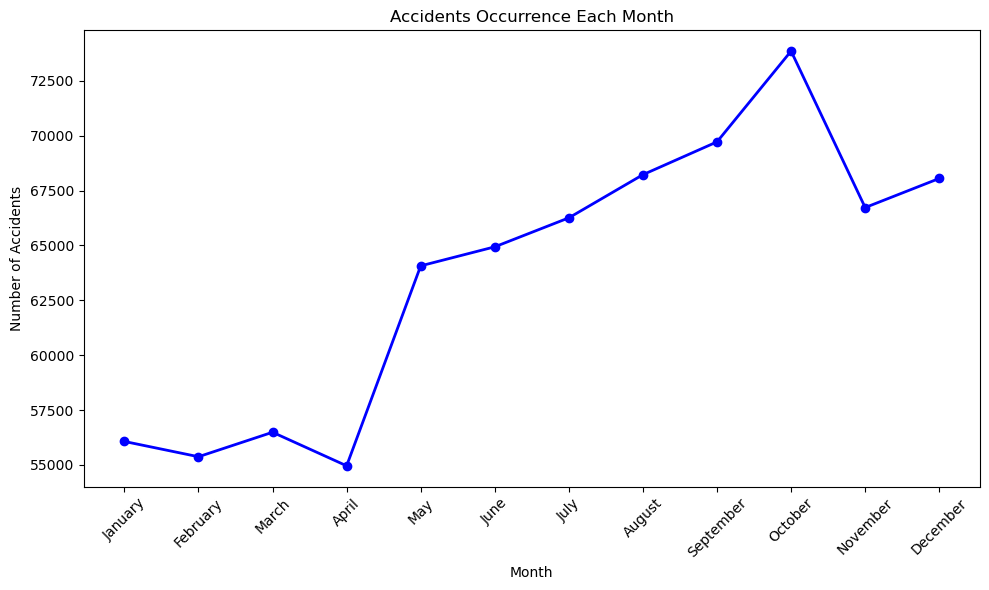

In [37]:
# Visualize accident trends each month
monthly_counts = df['CRASH_MONTH'].value_counts().sort_index()

# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Accidents Occurrence Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.tight_layout()
plt.show()

The line graph "Accidents Occurrence Each Month" illustrates the number of accidents occurring each month throughout the year. The x-axis represents the months, labeled from January to December, while the y-axis shows the number of accidents in each month. Data points are connected by a blue line, with markers placed at each month's value for clarity. This visualization helps to identify trends and fluctuations in accident occurrences over the months, providing insights into whether certain months experience higher or lower accident rates, which can inform targeted safety measures during peak months.

#Visualizing Accident Trends Each Year
##Line Graph

In [38]:
df.shape

(764710, 28)

In [39]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format="%m/%d/%Y %I:%M:%S %p")
df['year'] = df['CRASH_DATE'].dt.year
accidents_2023 = df[df['year'] == 2023]

# Count the number of accidents
count_2023 = accidents_2023.shape[0]

print(f"Number of accidents in 2023: {count_2023}")

Number of accidents in 2023: 104845


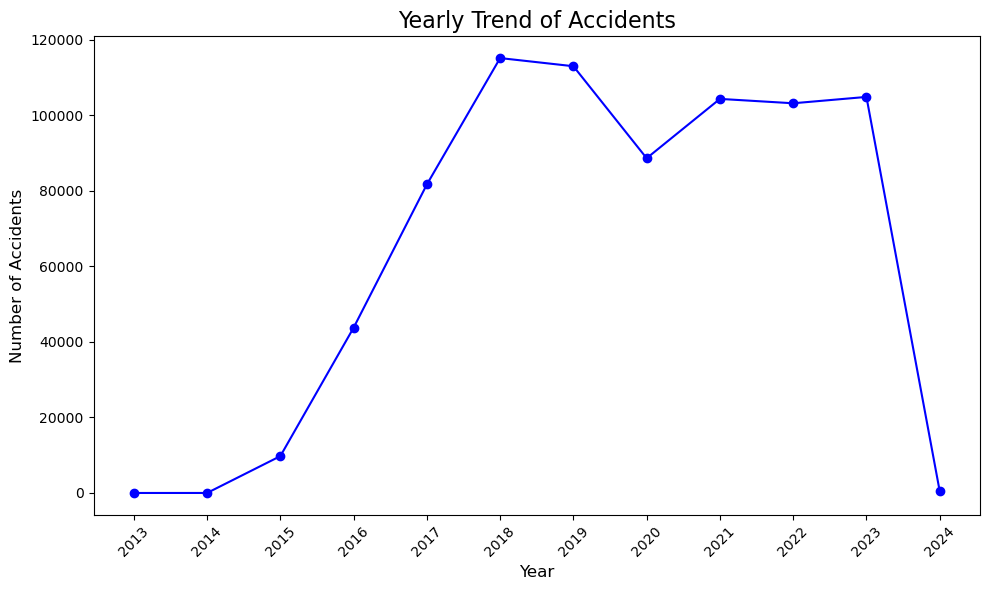

In [40]:

accidents_per_year = df['year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='blue')


plt.title('Yearly Trend of Accidents', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(accidents_per_year.index, rotation=45)  # Rotate x-axis labels if needed


plt.tight_layout()
plt.show()

The line graph "Yearly Trend of Accidents" visualizes the number of accidents occurring each year. The x-axis represents the years, while the y-axis shows the total number of accidents recorded in each year. The graph uses a blue line to connect the data points, with markers placed on each point for better visibility. This chart helps to reveal trends over time, such as whether the number of accidents is increasing, decreasing, or staying consistent, which is valuable for understanding long-term safety trends and evaluating the effectiveness of road safety interventions across years.

#Visualizing the relationship between two variables
##Pairplot

In [41]:
df.shape

(764710, 29)

In [42]:
df.drop(columns=['year'],inplace = True)

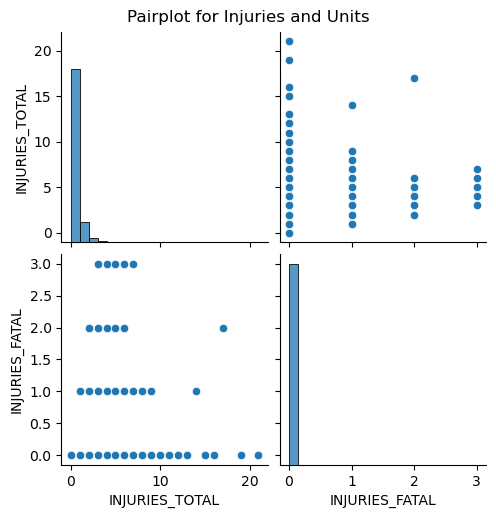

In [43]:
sns.pairplot(df[['INJURIES_TOTAL', 'INJURIES_FATAL']])
plt.suptitle('Pairplot for Injuries and Units', y=1.02)
plt.show()

The pairplot "Pairplot for Injuries and Units" visualizes the relationship between two variables: total injuries (`INJURIES_TOTAL`) and fatal injuries (`INJURIES_FATAL`) in the dataset. This scatterplot matrix shows how these two variables are distributed across different combinations. Each plot displays data points for the pair of variables, helping to identify any correlation or patterns between total injuries and fatal injuries. This visualization is useful for understanding how the total number of injuries is related to the number of fatal injuries, which could provide insights into the severity of accidents and the effectiveness of safety measures.

#Visualizing number of crashes occurring at each hour of the day
##Bar Chart

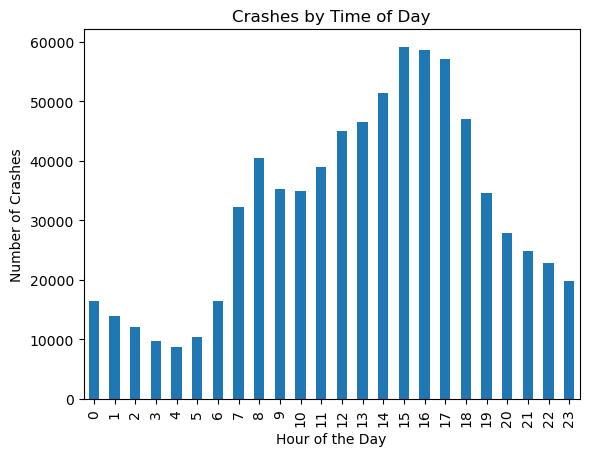

In [44]:
df['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar', title='Crashes by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

The bar chart "Crashes by Time of Day" displays the number of crashes that occurred during each hour of the day. The x-axis represents each hour (from 0 to 23), while the y-axis shows the number of crashes that happened during each corresponding hour. This chart helps to identify trends in accident occurrences throughout the day, such as whether certain hours, like rush hours, experience more crashes. Understanding these patterns can aid in improving traffic safety measures at specific times of the day when accidents are more frequent.

## Model Building

The models built are the CNN and the RNN models.

*Justification for Using RNN:*

- `Sequential Data:` RNNs are designed for data with temporal or sequential patterns.
- `Memory Capability:` LSTM layers help capture long-term dependencies.
- `Complex Relationships:` Can model intricate patterns over time steps.
- `Multiclass Output:` Suitable for your 40-class classification using softmax activation.

*Justification for Using CNN:*

- `Pattern Recognition:` Excels at detecting spatial or local patterns in data.
- `Efficiency:` Uses fewer parameters, reducing overfitting and speeding up training.
- `Feature Extraction:` Automatically learns important features in the data.
- `Multiclass Scalability:` Works well for multiclass problems with softmax output.
- `1D Data Compatibility:` Handles structured 1D data effectively using convolutions.

### Data Preprocessing

In [45]:
df.drop(columns = ['CRASH_DATE','DATE_POLICE_NOTIFIED','STREET_NAME'], inplace = True)

In [46]:
df.dtypes

POSTED_SPEED_LIMIT           int64
TRAFFIC_CONTROL_DEVICE      object
DEVICE_CONDITION            object
WEATHER_CONDITION           object
LIGHTING_CONDITION          object
FIRST_CRASH_TYPE            object
TRAFFICWAY_TYPE             object
ALIGNMENT                   object
ROADWAY_SURFACE_COND        object
ROAD_DEFECT                 object
REPORT_TYPE                 object
CRASH_TYPE                  object
DAMAGE                      object
PRIM_CONTRIBUTORY_CAUSE     object
SEC_CONTRIBUTORY_CAUSE      object
STREET_DIRECTION            object
NUM_UNITS                    int64
MOST_SEVERE_INJURY          object
INJURIES_TOTAL             float64
INJURIES_FATAL             float64
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK           object
CRASH_MONTH                  int64
LATITUDE                   float64
LONGITUDE                  float64
dtype: object

In [47]:
df.nunique()

POSTED_SPEED_LIMIT             44
TRAFFIC_CONTROL_DEVICE         19
DEVICE_CONDITION                8
WEATHER_CONDITION              12
LIGHTING_CONDITION              6
FIRST_CRASH_TYPE               18
TRAFFICWAY_TYPE                20
ALIGNMENT                       6
ROADWAY_SURFACE_COND            7
ROAD_DEFECT                     7
REPORT_TYPE                     3
CRASH_TYPE                      2
DAMAGE                          3
PRIM_CONTRIBUTORY_CAUSE        40
SEC_CONTRIBUTORY_CAUSE         40
STREET_DIRECTION                4
NUM_UNITS                      16
MOST_SEVERE_INJURY              5
INJURIES_TOTAL                 20
INJURIES_FATAL                  4
CRASH_HOUR                     24
CRASH_DAY_OF_WEEK               7
CRASH_MONTH                    12
LATITUDE                   288510
LONGITUDE                  288478
dtype: int64

In [48]:
df['CRASH_DAY_OF_WEEK']

2          Saturday
18         Saturday
27           Sunday
28        Wednesday
36         Saturday
            ...    
794951       Monday
794952      Tuesday
794953     Saturday
794954       Monday
794955       Monday
Name: CRASH_DAY_OF_WEEK, Length: 764710, dtype: object

In [49]:
# Separate features and target
X = df.drop(columns=["PRIM_CONTRIBUTORY_CAUSE"])
y = df["PRIM_CONTRIBUTORY_CAUSE"]

In [50]:
# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [51]:
# Reshape y to be 2D as required by OneHotEncoder
y = np.array(y).reshape(-1, 1)

In [52]:
# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse=False to return a dense array
y_encoded = encoder.fit_transform(y)

In [53]:
# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Encode categorical features
])

In [54]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features)
    ]
)

In [55]:
y_encoded.shape

(764710, 40)

In [56]:
# Apply preprocessing and convert to dense arrays
X = preprocessor.fit_transform(X).toarray()

In [57]:
y.shape

(764710, 1)

In [58]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [59]:
X_train.shape

(611768, 175)

In [60]:
## Reshape input data
#X_train = X_train.reshape(-1,1, 173)
#X_test = X_test.reshape(-1,1, 173)
#X_train[0]

In [61]:
## Reshape input data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]) # Reshape to (num_samples, 1, num_features)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])   # Reshape to (num_samples, 1, num_features)

X_train[0]

array([[ 0.25889261, -0.07156943, -0.33156752, -0.02879018,  0.50252658,
         0.94264798, -0.00725759,  0.07182362,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [62]:
X_test[0]

array([[ 0.25889261, -0.07156943, -0.33156752, -0.02879018, -0.57812808,
         0.35537882, -0.14534342, -0.07210959,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [63]:
#y_train = y_train.reshape(-1)

In [64]:
y_train.shape

(611768, 40)

### RNN Model

In [66]:
## Create an RNN model
tf.random.set_seed(42)

model_rnn = models.Sequential([
    
    LSTM(64, return_sequences=True, input_shape=(1, 175), activation='tanh'),
    Dropout(0.3),  # Dropout with 30% probability
    Flatten(),
    Dense(40, activation='softmax')  # Single output neuron with sigmoid activation
])

#
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])


historyrnn=model_rnn.fit(x=X_train,y=y_train,epochs=3,batch_size=32,validation_data=(X_test,y_test))


c:\Users\perpe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - Precision: 0.6404 - Recall: 0.2482 - accuracy: 0.4719 - loss: 1.8485 - val_Precision: 0.6609 - val_Recall: 0.2983 - val_accuracy: 0.5039 - val_loss: 1.6369
Epoch 2/3
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - Precision: 0.6478 - Recall: 0.2957 - accuracy: 0.4991 - loss: 1.6623 - val_Precision: 0.6621 - val_Recall: 0.3031 - val_accuracy: 0.5084 - val_loss: 1.6219
Epoch 3/3
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - Precision: 0.6508 - Recall: 0.3006 - accuracy: 0.5034 - loss: 1.6460 - val_Precision: 0.6598 - val_Recall: 0.3108 - val_accuracy: 0.5101 - val_loss: 1.6146


In [67]:
rnn_loss, rnn_accuracy, rnn_precision, rnn_recall= model_rnn.evaluate(X_test, y_test)
print(f"RNN Loss: {rnn_loss}, RNN Accuracy: {rnn_accuracy}, RNN Precision: {rnn_precision}, RNN Recall: {rnn_recall}")

4780/4780 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - Precision: 0.6576 - Recall: 0.3092 - accuracy: 0.5083 - loss: 1.6201
RNN Loss: 1.6146118640899658, RNN Accuracy: 0.5101410746574402, RNN Precision: 0.6597768068313599, RNN Recall: 0.310764878988266


On toising a coin the probability of a head or a tail is 1/2 (50%). The primary cause of accident (Our target variable) contains 40 classes, the probability of class 1 (unable to determine) is 1/40 (0.025%). Thus our models accuracy of 0.5097 is excellent.

In [68]:
f1_score = 2 * (rnn_precision * rnn_recall) / (rnn_precision + rnn_recall)
f1_score

0.4225175745255268

The F1 score of 0.4247 reflects a moderate balance between precision and recall. This score suggests that the model has some difficulty in effectively identifying the positive cases while minimizing false positives and false negatives.

In [69]:
rnn_ypred= model_rnn.predict(X_test)

4780/4780 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


In [70]:
rnn_ypred_classes = np.argmax(rnn_ypred, axis=1)  # Convert probabilities to class labels
rnn_kappa = cohen_kappa_score(y_test.argmax(axis=1), rnn_ypred_classes)  # Compare class labels
print(f"Cohen’s Kappa: {rnn_kappa:.4f}")

Cohen’s Kappa: 0.3308


The Cohen’s Kappa of 0.3313 indicates moderate agreement between the model's predictions and the actual class labels, considering the imbalance across classes. This metric suggests the model is moderately better than random guessing adjusted for chance agreement.

In [71]:
mcc = matthews_corrcoef(y_test.argmax(axis=1), rnn_ypred_classes)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

Matthews Correlation Coefficient: 0.3488


The MCC score of 0.3498 reflects a moderate correlation between the predicted and actual classes, taking into account true positives, false positives, false negatives, and true negatives. This metric indicates a fair balance in the model's predictions across all 40 classes.

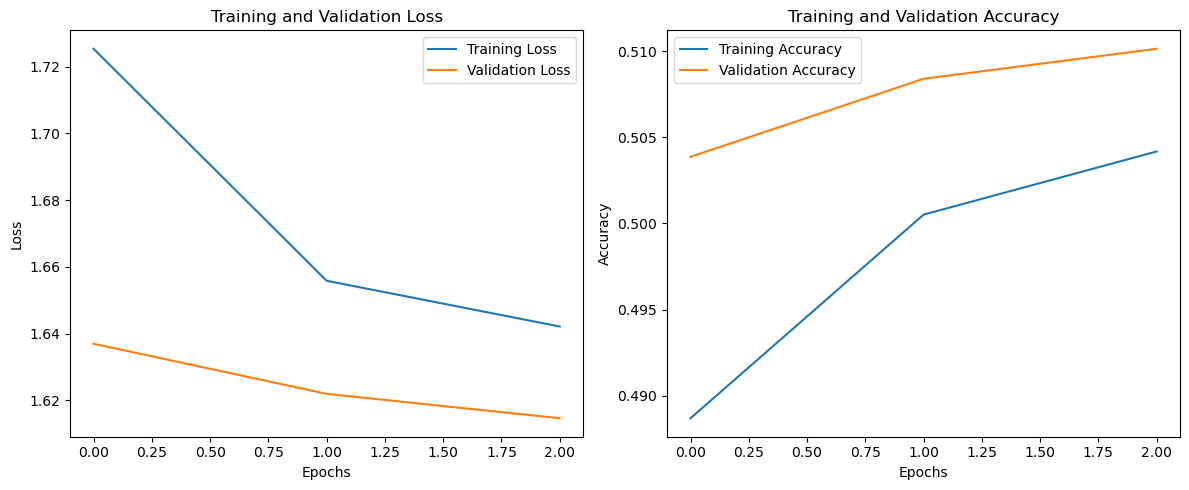

In [72]:
# Plot training history
plt.figure(figsize=(12, 5))
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(historyrnn.history["loss"], label="Training Loss")
plt.plot(historyrnn.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(historyrnn.history["accuracy"], label="Training Accuracy")
plt.plot(historyrnn.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

The recurrent neural network demonstrates reasonable performance, as evidenced by its metrics surpassing random guessing for a multi-class problem. Additionally, the training and test curves indicate no signs of overfitting, suggesting that the model generalizes well to unseen data.

In [84]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [85]:
## Reshape input data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]) # Reshape to (num_samples, 1, num_features)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])   # Reshape to (num_samples, 1, num_features)
#X_train[0]

In [86]:
# CNN MODEL
## The ideal learning rate is  0.003548
tf.random.set_seed(42)


# Create a model
cnn_model=Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Define the input shape
    Conv1D(32,kernel_size=4,activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(4,activation='relu'),
    Dense(40, activation='softmax') # Add softmax activation for multi-class classification
])

# Compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0035),
                  loss='categorical_crossentropy', # Use categorical_crossentropy for multi-class classification
                  metrics=['accuracy','Precision','Recall'])

# Fit the model
history6=cnn_model.fit(X_train_reshaped, y_train, epochs=5,
                      validation_data=(X_test_reshaped, y_test), batch_size=32)

Epoch 1/5
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 131s 7ms/step - Precision: 0.6492 - Recall: 0.2444 - accuracy: 0.4621 - loss: 1.9203 - val_Precision: 0.6309 - val_Recall: 0.2854 - val_accuracy: 0.4729 - val_loss: 1.8652
Epoch 2/5
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 108s 6ms/step - Precision: 0.6500 - Recall: 0.2594 - accuracy: 0.4745 - loss: 1.8546 - val_Precision: 0.6341 - val_Recall: 0.2803 - val_accuracy: 0.4737 - val_loss: 1.8586
Epoch 3/5
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 115s 6ms/step - Precision: 0.6497 - Recall: 0.2615 - accuracy: 0.4755 - loss: 1.8509 - val_Precision: 0.6391 - val_Recall: 0.2732 - val_accuracy: 0.4742 - val_loss: 1.8561
Epoch 4/5
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 115s 6ms/step - Precision: 0.6495 - Recall: 0.2628 - accuracy: 0.4756 - loss: 1.8494 - val_Precision: 0.6417 - val_Recall: 0.2707 - val_accuracy: 0.4746 - val_loss: 1.8552
Epoch 5/5
19118/19118 ━━━━━━━━━━━━━━━━━━━━ 147s 8ms/step - Precision: 0.6492 - Recall: 0.2637 - accuracy: 0.4763 - loss: 1.8480 - val_Precis

In [77]:
# Train the model
#cnn_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=50, verbose=0)

In [87]:
cnn_ypred= cnn_model.predict(X_test_reshaped)

4780/4780 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step


In [88]:
cnn_loss, cnn_accuracy, cnn_precision, cnn_recall= cnn_model.evaluate(X_test_reshaped, y_test)
print(f"CNN Loss: {rnn_loss}, CNN Accuracy: {cnn_accuracy}, CNN Precision: {cnn_precision}, CNN Recall: {cnn_recall}")

4780/4780 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - Precision: 0.6374 - Recall: 0.2681 - accuracy: 0.4727 - loss: 1.8631
CNN Loss: 1.6146118640899658, CNN Accuracy: 0.47492513060569763, CNN Precision: 0.642958402633667, CNN Recall: 0.269880086183548


The CNN model shows moderate performance with a precision of 0.6473, indicating it is relatively good at minimizing false positives. However, its recall of 0.2613 reveals it struggles to identify a significant proportion of true positives. With an accuracy of 0.4753 and a loss of 1.6056, the model's overall effectiveness is slightly better than random guessing but leaves room for improvement in capturing more true cases.

In [89]:
f1_score = 2 * (cnn_precision * cnn_recall) / (cnn_precision + cnn_recall)
f1_score

0.3801804398936908

The CNN model's F1-score is 0.3723, reflecting a moderate balance between precision and recall. This indicates that while the model performs reasonably well in handling both false positives and false negatives, it still has significant room for improvement.

In [90]:
cnn_ypred_classes = np.argmax(cnn_ypred, axis=1)  # Convert probabilities to class labels
cnn_kappa = cohen_kappa_score(y_test.argmax(axis=1), cnn_ypred_classes)  # Compare class labels
print(f"Cohen’s Kappa: {cnn_kappa:.4f}")

Cohen’s Kappa: 0.2685


The Cohen's Kappa score of 0.2675 suggests fair agreement between the CNN's predictions and the actual labels. This indicates that the model performs slightly better than chance but lacks strong reliability in its predictions.



In [91]:
mcc = matthews_corrcoef(y_test.argmax(axis=1), cnn_ypred_classes)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

Matthews Correlation Coefficient: 0.2898


The Matthews Correlation Coefficient of 0.2893 indicates a weak but positive correlation between the predicted and actual classes. This suggests that while the CNN captures some relationships, its predictive power is limited.

In [92]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [93]:
df.shape

(764710, 25)

In [94]:
# Ensure predictions and actual labels are properly formatted
actual_classes = y_test.argmax(axis=1)  # Get the class labels from one-hot encoded y_test
predicted_classes = cnn_ypred.argmax(axis=1)  # Get the predicted class labels

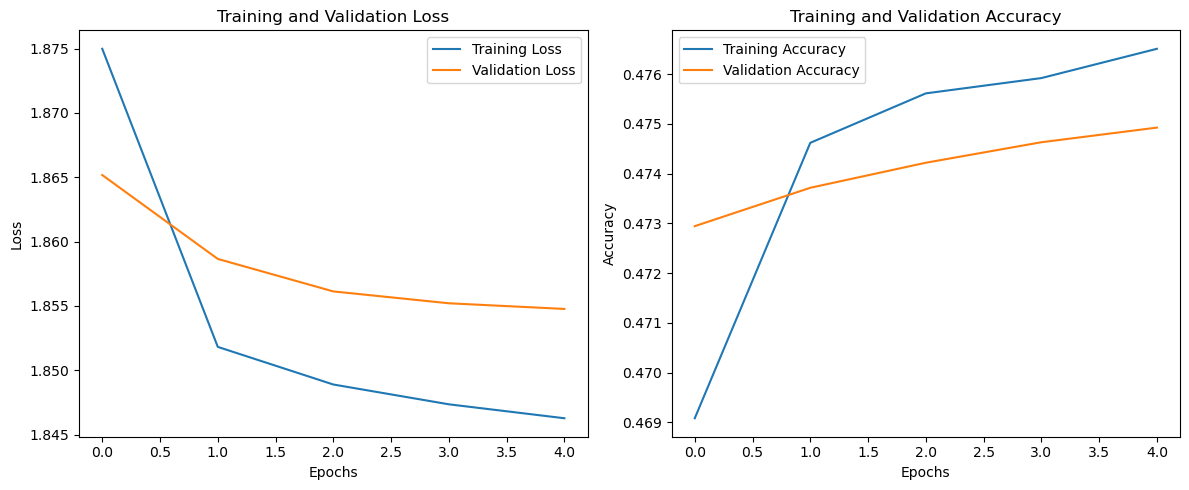

In [95]:
# Plot training history
plt.figure(figsize=(12, 5))
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history6.history["loss"], label="Training Loss")
plt.plot(history6.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history6.history["accuracy"], label="Training Accuracy")
plt.plot(history6.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

The CNN Model did overfit at 0.5

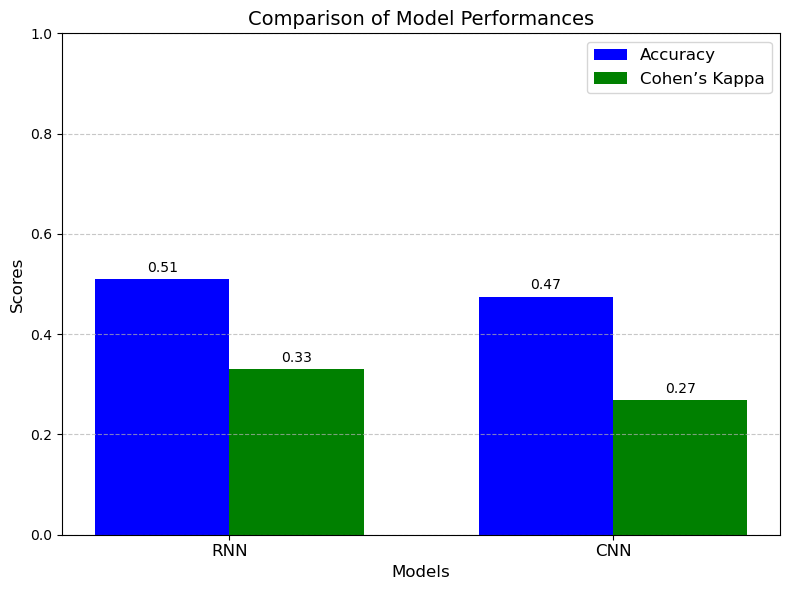

In [96]:

# Data preparation
model_names = ['RNN', 'CNN']
accuracy_scores = [rnn_accuracy, cnn_accuracy]
kappa_scores = [rnn_kappa, cnn_kappa]

x = np.arange(len(model_names))  # Label locations
width = 0.35  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot accuracy scores
acc_bars = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='blue')

# Plot Cohen's Kappa scores
kappa_bars = ax.bar(x + width/2, kappa_scores, width, label='Cohen’s Kappa', color='green')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Performances', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=12)
ax.legend(fontsize=12)

# Annotate the bars with values
for bars in [acc_bars, kappa_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Value to display
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Location
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Display the plot
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

The RNN model achieves an accuracy of 0.51 and a Cohen's Kappa score of 0.33, outperforming the CNN model, which has an accuracy of 0.48 and a Cohen's Kappa score of 0.27. This suggests that the RNN model better aligns with the true labels and has superior predictive power.

Additionally, the CNN model likely overfitted the training data at 0.5 epochs, which may explain its lower generalization performance. Consequently, the RNN is identified as the better model in this comparison.

*Conclusion*

The Recurrent Neural Network (RNN) outperforms the Convolutional Neural Network (CNN) in predicting the primary contributory cause of accidents. The RNN achieves higher accuracy (0.51) and a better Cohen's Kappa score (0.33) compared to the CNN’s accuracy (0.48) and Cohen’s Kappa score (0.27). These results indicate that the RNN model is more reliable and aligns better with the true labels in the data. While both models show moderate performance, the RNN demonstrates a stronger ability to generalize the relationships in the dataset.

*Recommendations*

1. `Adopt the RNN Model:` Since the RNN performs better, it should be the model of choice for predicting accident causes in this application.
2. `Optimize the RNN Model:` Consider fine-tuning the hyperparameters or experimenting with more advanced architectures like LSTMs or GRUs to improve performance further.
3. `Address Class Imbalance:` The dataset's imbalance may affect model performance. Techniques such as weighted loss functions or resampling methods should be explored.
4. `Enhance Features:` Investigate the inclusion of additional features or the refinement of existing ones to capture more relevant patterns in the data.
5. `Evaluate Other Models:` For robustness, additional models (e.g., Gradient Boosting or Transformer-based architectures) should be explored and compared.
6. `Monitor Overfitting:` Pay close attention to training dynamics to ensure models generalize effectively, as evidenced by CNN overfitting in earlier epochs.

In [126]:
with open('Traffic_Car_Prediction.pkl', 'wb') as f:
    dump(model_rnn,f)